In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
#Importing each .csv file into it's own dataframe -- all the datasets have been cleaned and 
#trimmed to only contain data for olympic atheletes

dfB = pd.read_csv(r'/Users/navo/Desktop/OPData/BoulderExport.csv')
dfL = pd.read_csv(r'/Users/navo/Desktop/OPData/LeadExport.csv')
dfS = pd.read_csv(r'/Users/navo/Desktop/OPData/SpeedExport.csv')
dfC = pd.read_csv(r'/Users/navo/Desktop/OPData/CombinedExport.csv')

In [3]:
#Create separate dataframes for each event, by gender

dfBM = dfB[dfB['Gender']=='M'].groupby('LAST')['RankB'].mean().reset_index()
dfBF = dfB[dfB['Gender']=='F'].groupby('LAST')['RankB'].mean().reset_index()
dfLM = dfL[dfL['Gender']=='M'].groupby('LAST')['RankL'].mean().reset_index()
dfLF = dfL[dfL['Gender']=='F'].groupby('LAST')['RankL'].mean().reset_index()
dfSM = dfS[dfS['Gender']=='M'].groupby('LAST')['RankS'].mean().reset_index()
dfSF = dfS[dfS['Gender']=='F'].groupby('LAST')['RankS'].mean().reset_index()
dfCM = dfC[dfC['Gender']=='M'].groupby('LAST')['RankC'].mean().reset_index()
dfCF = dfC[dfC['Gender']=='F'].groupby('LAST')['RankC'].mean().reset_index()


In [9]:
#Create a master dataframe for each gender, merging on the last name
dfAM = dfBM.merge(dfLM, how = 'outer', on = 'LAST')
dfAM = dfAM.merge(dfSM, how= 'outer', on = 'LAST')

dfAF = dfBF.merge(dfLF, how = 'outer', on = 'LAST')
dfAF = dfAF.merge(dfSF, how= 'outer', on = 'LAST')

In [13]:
#Create new columns in the master dataframe for men, ranking competitors by their 
#average rank in the three discplines
dfAM['RankOB'] = dfAM['RankB'].rank(ascending = True)
dfAM['RankOL'] = dfAM['RankL'].rank(ascending = True)
dfAM['RankOS'] = dfAM['RankS'].rank(ascending = True)

#Create a new column that computes the product of the three ranks (combined rank)
dfAM['RankC'] = dfAM.RankOB * dfAM.RankOL * dfAM.RankOS
dfAM.sort_values(by = 'RankC', ascending = True)

,LAST,RankB,RankL,RankS,RankOB,RankOL,RankOS,RankC
11,NARASAKI,3.923077,11.000000,36.090909,1.0,3.0,4.0,12.0
12,ONDRA,6.714286,1.800000,67.333333,2.0,1.0,15.0,30.0
6,HOJER,11.785714,30.375000,36.333333,5.0,9.0,5.0,225.0
16,SCHUBERT,14.076923,13.478261,49.583333,6.0,4.0,11.0,264.0
3,FOSSALI,81.333333,88.200000,16.200000,16.0,18.0,1.0,288.0
10,MEGOS,21.400000,5.666667,77.111111,9.0,2.0,17.0,306.0
0,CHON,7.000000,30.666667,54.571429,3.0,10.0,13.0,390.0
5,HARADA,14.307692,17.375000,43.636364,7.0,7.0,8.0,392.0
8,MAWEM,35.950000,69.300000,17.200000,13.0,17.0,2.0,442.0
1,COLEMAN,21.200000,29.200000,42.500000,8.0,8.0,7.0,448.0


In [37]:
#Create new columns in the master dataframe for men, ranking competitors by their 
#average rank in the three discplines
dfAF['RankOB'] = dfAF['RankB'].rank(ascending = True)
dfAF['RankOL'] = dfAF['RankL'].rank(ascending = True)
dfAF['RankOS'] = dfAF['RankS'].rank(ascending = True)

#Create a new column that computes the product of the three ranks (combined score)
dfAF['RankC'] = dfAF.RankOB*dfAF.RankOL*dfAF.RankOS
dfAF.sort_values(by = 'RankC', ascending = True)

,LAST,RankB,RankL,RankS,RankOB,RankOL,RankOS,RankC
3,GARNBRET,1.090909,2.923077,33.700000,1.0,1.0,9.0,9.0
11,NOGUCHI,2.076923,5.750000,36.384615,2.0,3.0,12.0,72.0
12,NONAKA,2.818182,16.714286,26.222222,3.0,7.0,5.0,105.0
13,PILZ,11.916667,3.166667,41.900000,6.0,2.0,15.0,180.0
10,MIROSLAW,73.250000,84.500000,1.200000,18.0,18.0,1.0,324.0
6,KLINGLER,7.666667,25.000000,32.000000,5.0,11.0,7.0,385.0
2,COXSEY,5.142857,20.333333,42.250000,4.0,8.0,16.0,512.0
4,JAUBERT,47.750000,57.125000,4.933333,16.0,16.0,2.0,512.0
16,SEO,13.000000,11.666667,51.666667,7.0,5.0,17.0,595.0
7,KRAMPL,20.625000,8.166667,58.666667,10.0,4.0,19.0,760.0


Text(0, 0.5, 'log(Combined Score)')

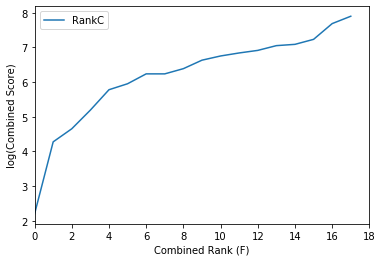

In [174]:
#Quick plot of the combined rank vs. log(combined score) for women
dfAF.sort_values(by = 'RankC', ascending = True)['RankC'].reset_index().drop(columns='index').apply(np.log).plot(kind='line')
plt.xlabel('Combined Rank (F)')
plt.ylabel('log(Combined Score)')

Text(0, 0.5, 'log(Combined Score)')

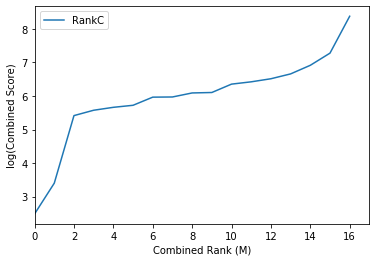

In [154]:
#Quick plot of the combined rank vs. log(combined score) for men
dfAM.sort_values(by = 'RankC', ascending = True)['RankC'].reset_index().drop(columns='index').apply(np.log).plot(kind='line')
plt.xlabel('Combined Rank (M)')
plt.ylabel('log(Combined Score)')

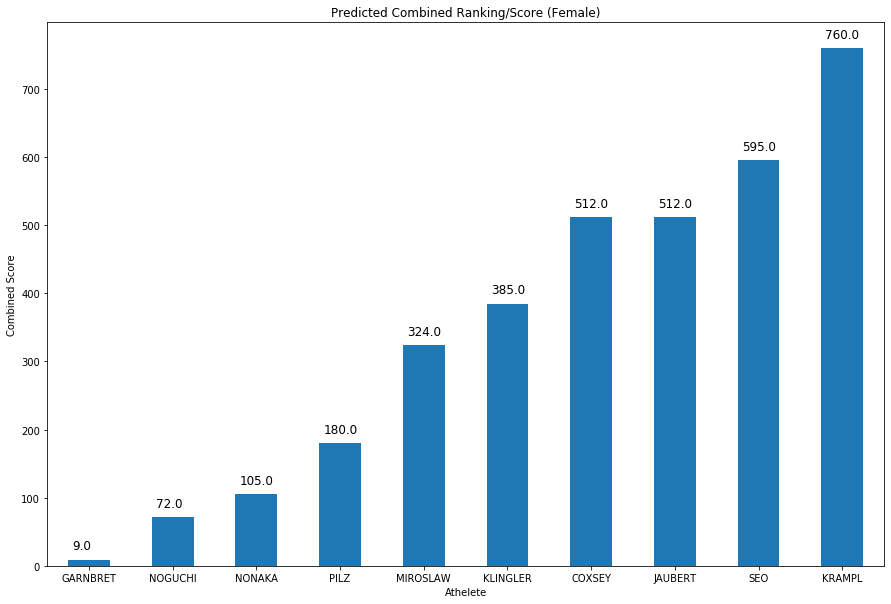

In [139]:
#Bar plot of the predicted combined ranking for women
plt.figure(figsize=(15,10))
dfAF.groupby('LAST')['RankC'].mean().sort_values(ascending = True)[0:10].plot(kind = 'bar')
plt.ylabel('Combined Score')
plt.xlabel('Athelete')
plt.xticks(rotation=0)
plt.title("Predicted Combined Ranking/Score (Female)")
# Create labels
label = dfAF.groupby('LAST')['RankC'].mean().sort_values(ascending = True)[0:10]

# Text on the top of each bar
for i in range(0,10):
    plt.text(x = i-0.2 , y =label[i]+15, s = label[i], size = 12)

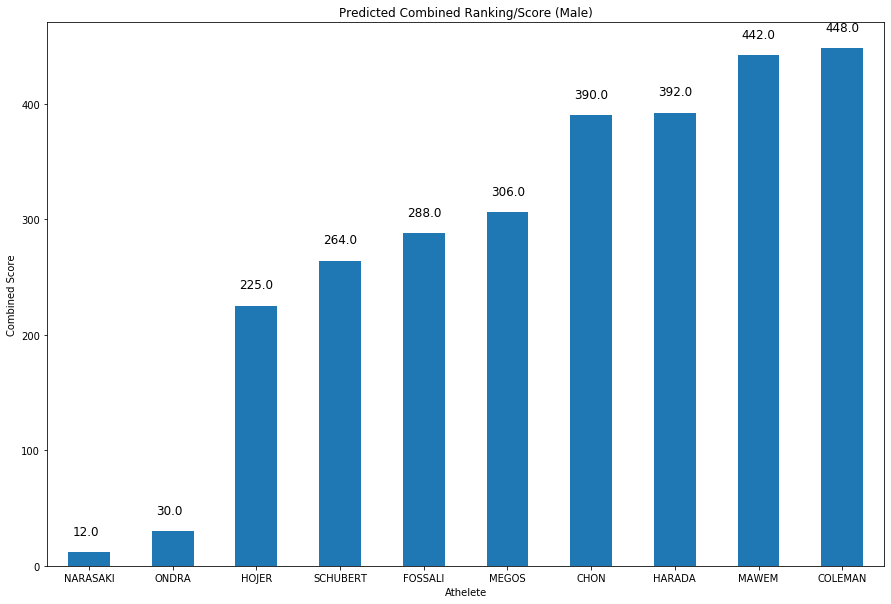

In [140]:
#Bar plot of the predicted combined ranking for men
plt.figure(figsize=(15,10))
dfAM.groupby('LAST')['RankC'].mean().sort_values(ascending = True)[0:10].plot(kind = 'bar')
plt.ylabel('Combined Score')
plt.xlabel('Athelete')
plt.xticks(rotation=0)
plt.title("Predicted Combined Ranking/Score (Male)")
# Create labels
label = dfAM.groupby('LAST')['RankC'].mean().sort_values(ascending = True)[0:10]

# Text on the top of each bar
for i in range(0,10):
    plt.text(x = i-0.2 , y =label[i]+15, s = label[i], size = 12)

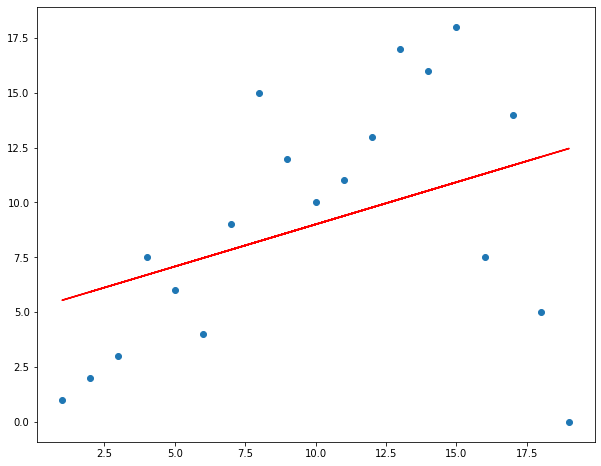

In [150]:
dfAF['RankOC'] = dfAF['RankC'].rank(ascending = True).replace(np.nan,0)

from sklearn.linear_model import LinearRegression
X = dfAF['RankOB'].values.reshape(-1,1)  # values converts it into a numpy array
Y = dfAF['RankOC']
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X,Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.figure(figsize=(10,8))
plt.scatter(dfAF['RankOB'],dfAF['RankOC'])
plt.plot(X, Y_pred, color='red')
plt.show()

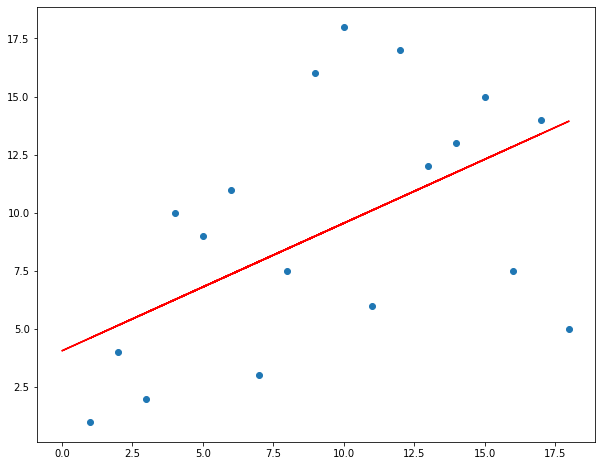

In [149]:
from sklearn.linear_model import LinearRegression
X = dfAF['RankOL'].replace(np.nan,0).values.reshape(-1,1)  # values converts it into a numpy array
Y = dfAF['RankOC']
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X,Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.figure(figsize=(10,8))
plt.scatter(dfAF['RankOL'],dfAF['RankOC'])
plt.plot(X, Y_pred, color='red')
plt.show()

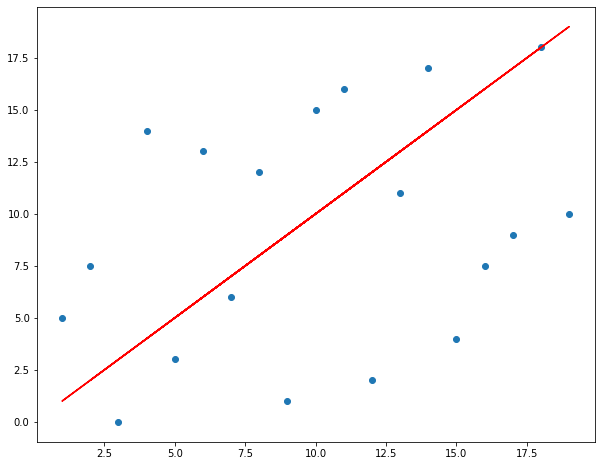

In [151]:
from sklearn.linear_model import LinearRegression
X = dfAF['RankOS'].replace(np.nan,0).values.reshape(-1,1)  # values converts it into a numpy array
Y = dfAF['RankOS']
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X,Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.figure(figsize=(10,8))
plt.scatter(dfAF['RankOS'],dfAF['RankOC'])
plt.plot(X, Y_pred, color='red')
plt.show()

In [186]:
dfSAF = dfAF.drop(columns=['RankB','RankL','RankS','RankC','RankOC'])
dfSAF['ScoreOCS'] = dfSAF['RankOB'] + dfSAF['RankOL'] + dfSAF['RankOS']
dfSAF.sort_values(by = 'ScoreOCS', ascending = True).reset_index().drop(columns=['index']).replace(np.nan,0)

,LAST,RankOB,RankOL,RankOS,ScoreOCS
0,GARNBRET,1.0,1.0,9.0,11.0
1,NONAKA,3.0,7.0,5.0,15.0
2,NOGUCHI,2.0,3.0,12.0,17.0
3,KLINGLER,5.0,11.0,7.0,23.0
4,PILZ,6.0,2.0,15.0,23.0
5,COXSEY,4.0,8.0,16.0,28.0
6,SEO,7.0,5.0,17.0,29.0
7,CHANOURDIE,11.0,6.0,13.0,30.0
8,CONDIE,9.0,13.0,8.0,30.0
9,MACKENZIE,12.0,14.0,6.0,32.0


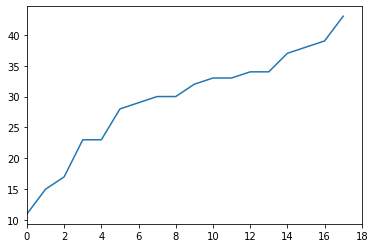

In [177]:
dfSAF.sort_values(by = 'ScoreOCS', ascending = True).reset_index().drop(columns=['index'])['ScoreOCS'].plot(kind='line')

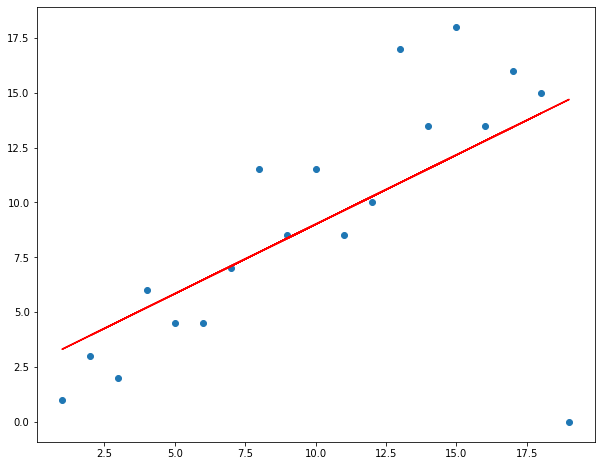

In [188]:
dfSAF['RankOCS'] = dfSAF['ScoreOCS'].rank(ascending = True).replace(np.nan,0)

from sklearn.linear_model import LinearRegression
X = dfSAF['RankOB'].values.reshape(-1,1)  # values converts it into a numpy array
Y = dfSAF['RankOCS']
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X,Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.figure(figsize=(10,8))
plt.scatter(dfSAF['RankOB'],dfSAF['RankOCS'])
plt.plot(X, Y_pred, color='red')
plt.show()

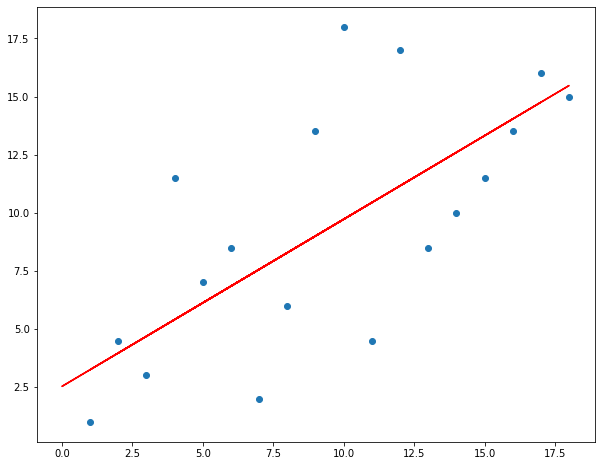

In [189]:
from sklearn.linear_model import LinearRegression
X = dfSAF['RankOL'].replace(np.nan,0).values.reshape(-1,1)  # values converts it into a numpy array
Y = dfSAF['RankOCS']
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X,Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.figure(figsize=(10,8))
plt.scatter(dfSAF['RankOL'],dfSAF['RankOCS'])
plt.plot(X, Y_pred, color='red')
plt.show()

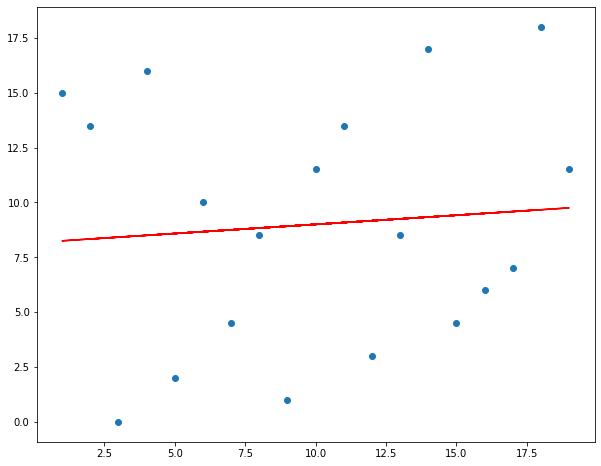

In [190]:
from sklearn.linear_model import LinearRegression
X = dfSAF['RankOS'].replace(np.nan,0).values.reshape(-1,1)  # values converts it into a numpy array
Y = dfSAF['RankOCS']
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X,Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.figure(figsize=(10,8))
plt.scatter(dfSAF['RankOS'],dfSAF['RankOCS'])
plt.plot(X, Y_pred, color='red')
plt.show()